# Decision Tree to Diagnose Heart Disease

The objective is to create an intelligent agent, which can suggest a diagnose of heart diseases.<br>
The task is to train a model of human heart, based on measurements, taken from numerous heart disease patients.<br>
For the training we will use data from a public source: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

## Step 1: Load the Libraries 

In [ ]:
# Install the graphviz package for DT visualisation
!pip install graphviz

In [1]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

# for numeric calculations
import numpy as np

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# from utilities import visualize_classifier
import graphviz

## Step 2: Load a Dataset

First, we load the data from file __processed.cleveland.data__ by use of pandas<br>
It is a table data in __csv__ format.<br>
Columns contain various parameters of human heart. <br>

In [2]:
# Create URL object
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"

As the data has no header, we need to specify the names of each column before loading it. We get the information of interpretation from the file __heart-disease.names__

In [4]:
# Create a header
names = ['age','sex','cp','bps','chol','fbs','ecg','hrate','ang','peak','slp','ca','thal','diag']

In [5]:
# Load the data, create a dataset object
dataset = pandas.read_csv(url, names=names, na_values=["?"])

## Step 3: Get to Know The Data

### General Overview
Investigate the dataset. <br>
Find out how many records are available, are they all clean, how many classes they represent. <br>
Create diagrams to visualize the set and its descriptive statistics.

In [6]:
# See the shape (number of rows) and size (number of columns)
print(dataset.shape)

(303, 14)


In [9]:
list(dataset)

['age',
 'sex',
 'cp',
 'bps',
 'chol',
 'fbs',
 'ecg',
 'hrate',
 'ang',
 'peak',
 'slp',
 'ca',
 'thal',
 'diag']

In [8]:
# See how it looks (get the first 5 records)
dataset.sample(10)

,age,sex,cp,bps,chol,fbs,ecg,hrate,ang,peak,slp,ca,thal,diag
168,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0,1
249,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,0
206,58.0,1.0,4.0,128.0,259.0,0.0,2.0,130.0,1.0,3.0,2.0,2.0,7.0,3
118,63.0,1.0,4.0,130.0,330.0,1.0,2.0,132.0,1.0,1.8,1.0,3.0,7.0,3
188,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1
278,57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0,1
42,71.0,0.0,2.0,160.0,302.0,0.0,0.0,162.0,0.0,0.4,1.0,2.0,3.0,0
271,66.0,1.0,4.0,160.0,228.0,0.0,2.0,138.0,0.0,2.3,1.0,0.0,6.0,0
182,42.0,1.0,1.0,148.0,244.0,0.0,2.0,178.0,0.0,0.8,1.0,2.0,3.0,0
154,64.0,1.0,4.0,120.0,246.0,0.0,2.0,96.0,1.0,2.2,3.0,1.0,3.0,3


In [7]:
# Have the descriptive statistics calculated for the whole dataset
print(dataset.describe())

              age         sex          cp         bps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

              ecg       hrate         ang        peak         slp          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     303 non-null    float64
 1   sex     303 non-null    float64
 2   cp      303 non-null    float64
 3   bps     303 non-null    float64
 4   chol    303 non-null    float64
 5   fbs     303 non-null    float64
 6   ecg     303 non-null    float64
 7   hrate   303 non-null    float64
 8   ang     303 non-null    float64
 9   peak    303 non-null    float64
 10  slp     303 non-null    float64
 11  ca      299 non-null    float64
 12  thal    301 non-null    float64
 13  diag    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [9]:
# to check null values in data
dataset.isnull().sum()

age      0
sex      0
cp       0
bps      0
chol     0
fbs      0
ecg      0
hrate    0
ang      0
peak     0
slp      0
ca       4
thal     2
diag     0
dtype: int64

In [10]:
# to check null values in data
np.isnan(dataset).sum()

age      0
sex      0
cp       0
bps      0
chol     0
fbs      0
ecg      0
hrate    0
ang      0
peak     0
slp      0
ca       4
thal     2
diag     0
dtype: int64

In [10]:
# detect non-missing values
df = dataset[dataset.notnull()]

In [11]:
df.shape

(303, 14)

### Clean The Dataset

In [12]:
dataset = dataset.dropna()

In [12]:
# Group by class attribute diag
# See how many classes are included and how many records per class are distributed
print(dataset.groupby('diag').size())

diag
0    164
1     55
2     36
3     35
4     13
dtype: int64


### Visualization of Dataset Statistics
    1. Draw Histograms
    2. Draw Scatter Plots
    3. Draw Box-Whisker Plots

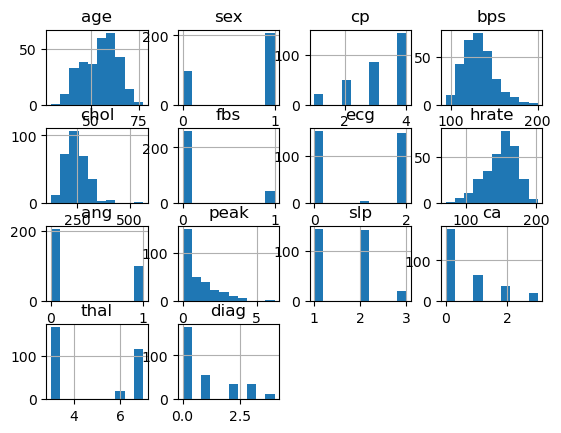

In [13]:
# Draw histograms for each feature
dataset.hist()
plt.show()

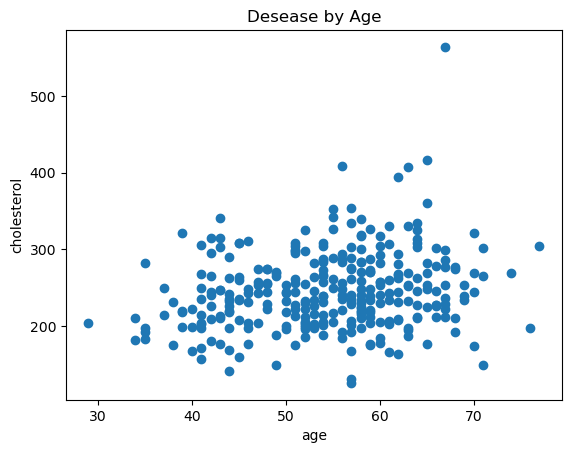

In [14]:
# Generate scatter plot 
plt.scatter(dataset['age'], dataset['chol'],  marker="o", picker=True)
plt.title(f'Desease by Age')
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.show()

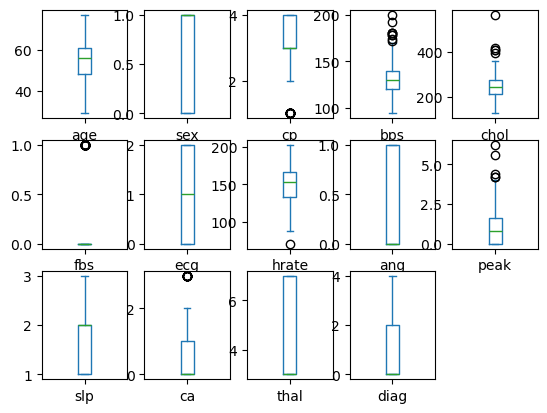

In [15]:
# Draw box-whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

These diagrams show the distribution of the values in the columns. <br>
Some of them seem to have Normal (Gaussian) distribution.<br> 
It is good to know, as we can later choose appropriate algorithms for exploitation.

### Prepare The Data For Training

In [17]:
# Convert the dataset into array
array = dataset.values

In [18]:
# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1]

In [19]:
# Separate input data into classes based on labels of diagnoses
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])
class2 = np.array(X[y==2])
class3 = np.array(X[y==3])
class4 = np.array(X[y==4])

## Step 4: Training
Time to try to train a model.
1. Split the dataset into two: __training set__ and __test set__
2. Build the classifier by implementing __Decision Tree__ algorithm over the training set
3. Test the classifier over the test set
3. Estimate how accurate it is

In [47]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.15

In [48]:
#  Initialize seed parameter for the random number generator used for the split
# seed = 12

In [67]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [68]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier()
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)

In [69]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
# draw tree from the trained data by graphviz package

dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=dataset.columns[:13], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True)   

In [71]:
# result DT saved in file heart.pdf
graph = graphviz.Source(dot_data)
graph.render("heart") 

'heart.pdf'

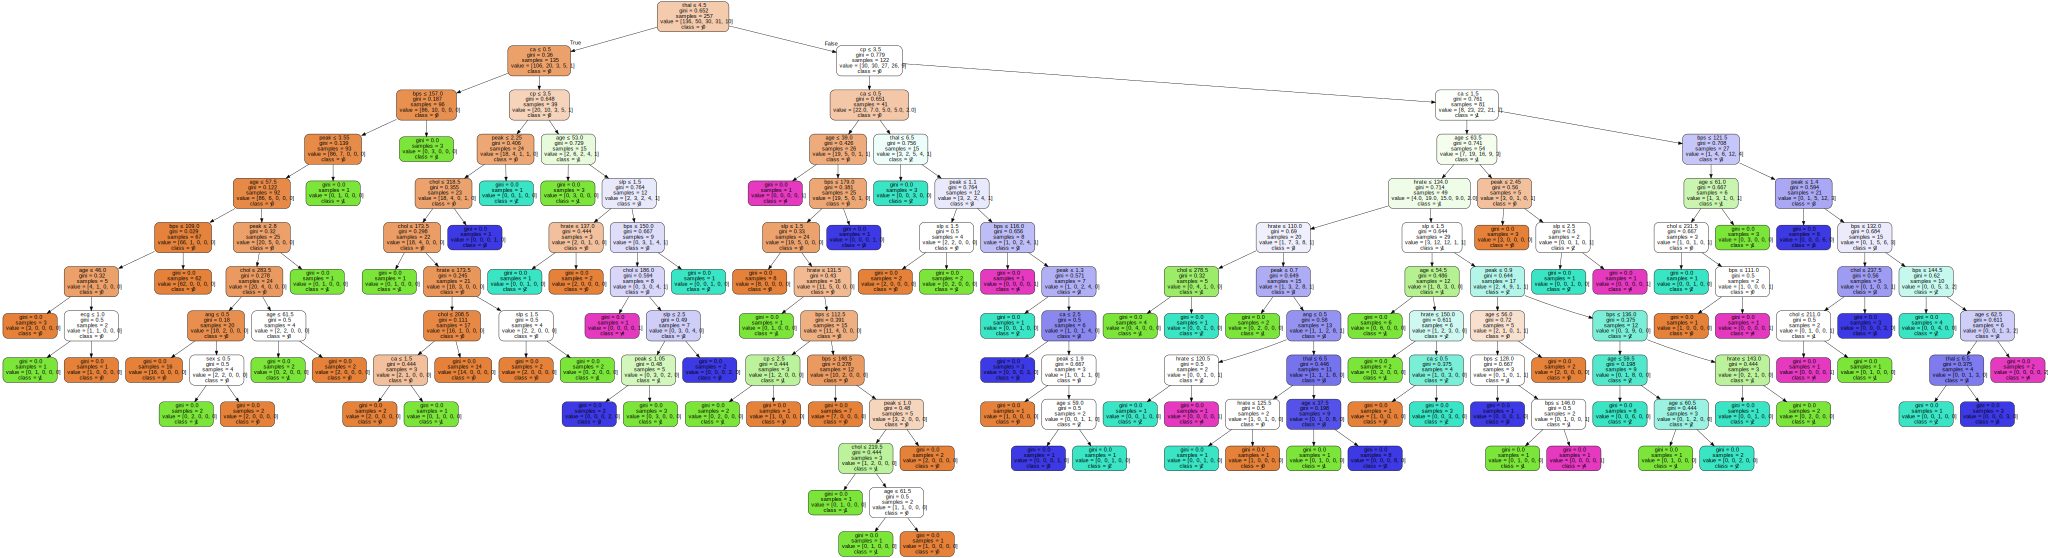

In [72]:
# show it here
graph 

## Step 5. Model Validation

We need a metrics for the evaluation
‘accuracy‘ is the percentage % of correctly predicted instances from the total number of instances in the dataset.

In [73]:
# Set the metrics
scoring = 'accuracy'

Now we can try to implement the model on our test set.


In [74]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 3., 0., 0., 1., 0., 0., 3.,
       1., 3., 2., 0., 0., 0., 0., 3., 0., 1., 3., 1., 1., 0., 2., 0., 1.,
       3., 3., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.])

In [75]:
y_test

array([3., 0., 0., 0., 1., 0., 0., 0., 0., 1., 4., 0., 0., 0., 0., 0., 2.,
       0., 3., 3., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 3., 0., 2.,
       2., 4., 1., 0., 2., 0., 1., 0., 2., 4., 0., 0.])

In [76]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.45652173913043476


In [77]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[20,  7,  0,  1,  0],
       [ 4,  0,  0,  1,  0],
       [ 1,  3,  0,  2,  0],
       [ 0,  1,  2,  1,  0],
       [ 1,  0,  0,  2,  0]])

In [78]:
confusion = pandas.crosstab(y_test,y_testp)
confusion

col_0,0.0,1.0,2.0,3.0
row_0,,,,
0.0,20,7,0,1
1.0,4,0,0,1
2.0,1,3,0,2
3.0,0,1,2,1
4.0,1,0,0,2


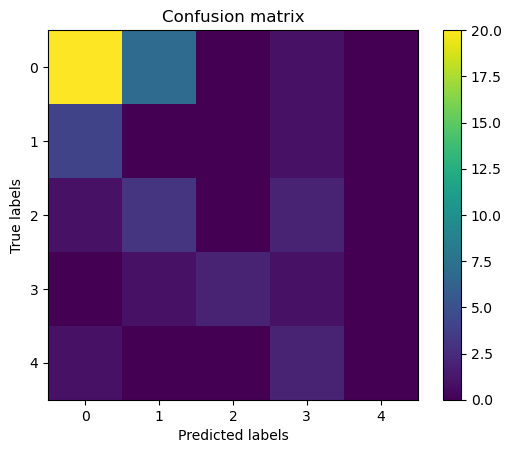

In [79]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

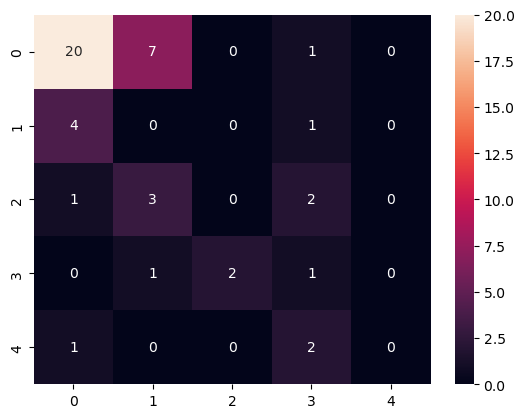

In [80]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [81]:
# The diagonal elements (TN, TP) represent the number of points for which the predicted label is equal to the true label, 
# while off-diagonal elements are those that are mislabeled by the classifier. 
# The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
# FN - False Negative prediction
# FP - False Positive prediction

In [82]:
# Confusion matrix provides an indication of the  errors made in predictions, here in text format
# print(confusion_matrix(y_test, y_testp))

In [83]:
class_names = ['Class0', 'Class1', 'Class2','Class3', 'Class4']
# Classifier performance on training dataset

print(classification_report(y_train, classifier.predict(X_train), target_names=class_names) )
plt.show()

              precision    recall  f1-score   support

      Class0       1.00      1.00      1.00       136
      Class1       1.00      1.00      1.00        50
      Class2       1.00      1.00      1.00        30
      Class3       1.00      1.00      1.00        31
      Class4       1.00      1.00      1.00        10

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



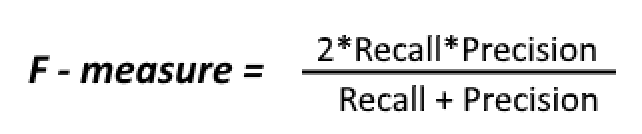

In [85]:
# Classifier performance on test dataset
print(classification_report(y_test, classifier.predict(X_test), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

      Class0       0.77      0.71      0.74        28
      Class1       0.00      0.00      0.00         5
      Class2       0.00      0.00      0.00         6
      Class3       0.14      0.25      0.18         4
      Class4       0.00      0.00      0.00         3

    accuracy                           0.46        46
   macro avg       0.18      0.19      0.18        46
weighted avg       0.48      0.46      0.47        46



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## <span style="color:red">Task</span>
Try to improve the model by applying Random Forest classifier provided in sklearn.<br>
Repeat the training, testing and validation.<br>
Compare the Decision Tree and Random Forest methods.
Answer to the question: Which method gives better results?